In [1]:
import numpy as nm  
import matplotlib.pyplot as plt  
import pandas as pd 

In [3]:
obesity_data = pd.read_csv('../data/obesity_numeric.csv')
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.6,64.0,1,0,1,2.0,1,0,1,0,0,1,0,3,1
1,0,21.0,1.5,56.0,1,0,2,2.0,1,1,2,1,3,0,1,3,1
2,1,23.0,1.8,77.0,1,0,1,2.0,1,0,1,0,2,1,2,3,1
3,1,27.0,1.8,87.0,0,0,2,2.0,1,0,1,0,2,0,2,4,2
4,1,22.0,1.8,89.8,0,0,1,0.0,1,0,1,0,0,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21.0,1.7,131.4,1,1,2,2.0,1,0,1,0,2,1,1,3,3
2107,0,22.0,1.7,133.7,1,1,2,2.0,1,0,1,0,1,1,1,3,3
2108,0,23.0,1.8,133.7,1,1,2,2.0,1,0,1,0,1,1,1,3,3
2109,0,24.0,1.7,133.3,1,1,2,2.0,1,0,2,0,1,1,1,3,3


In [28]:
X = obesity_data.iloc[:, 0:15].values  
y = obesity_data.iloc[:, 16].values  

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [30]:
from sklearn.preprocessing import StandardScaler    
X_scaler = StandardScaler().fit(X_train)

In [31]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.852
k: 3, Train/Test Score: 0.905/0.837
k: 5, Train/Test Score: 0.875/0.822
k: 7, Train/Test Score: 0.860/0.824
k: 9, Train/Test Score: 0.848/0.811
k: 11, Train/Test Score: 0.833/0.814
k: 13, Train/Test Score: 0.824/0.812
k: 15, Train/Test Score: 0.815/0.799
k: 17, Train/Test Score: 0.810/0.801
k: 19, Train/Test Score: 0.805/0.790


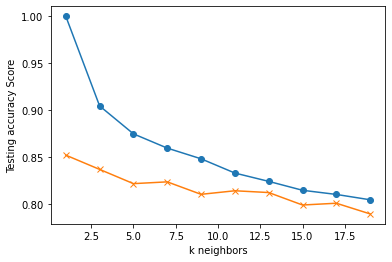

In [34]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.814
